# Lab 9: Pre-Processing with Scikit-Learn and Pandas

The objective of this notebook is to learn about **pre-processing** with the **Scikit-Learn** and **Pandas** libraries. Then, train a simple binary classifier on the pre-processed dataset.

In this lab, we will train a binary classification model that predicts which **passengers survived** the **Titanic shipwreck** <a href="https://www.kaggle.com/c/titanic" >link</a>.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, you are asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). For now we just focus on the preprocessing part, but you can come back here later after the laboratory on classification

You can find a detailed **tutorial** <a href="https://datasciencewithchris.com/kaggle-titanic-data-cleaning-and-preprocessing/" >here</a>.

## Outline

- [1. Load Dataset](#1)
- [2.  Data pre-processing](#2)
- [3. Model training](#3) (Following the workshop on classification)


First, run the following cell to import some useful libraries to complete this Lab. If not already done, you must install them in your virtual environment

In [2]:
import pandas as pd

pd.options.display.max_columns= 50
pd.options.display.max_rows= None

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.impute import SimpleImputer

<a id='1'></a>
## 1. Load dataset

Firstly, you will load the **Titanic** dataset used in this lab into a DataFrame `df`. 

**Scikit-Learn** comes with built-in datasets for the **Titanic dataset**. The next cell loads the titanic dataset from Scikit-Learn and stores it in a Pandas DataFrame.

In [3]:
df, y = fetch_openml('titanic', version=1, as_frame=True, parser='auto', return_X_y=True)
df["survived"] = y

In [4]:
df.to_csv("lab6_data.csv")

Run the next cell to look at the first 5 rows of the dataset.

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [6]:
print("Number of samples:", len(df))

Number of samples: 1309


In [7]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

The dataset is composed of 1309 samples. Each row contains information on each passenger. Specifically, the dataset contains the following attributes:

- **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name**: Passenger name
- **sex**: Passenger sex
- **age**: Passenger age
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **ticket**: Ticket Number
- **fare**: Passenger Fare
- **cabin**: Cabin
- **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- **boat**: Lifeboat (if survived)
- **body**: Body number (if did not survive and body was recovered). It could be another target.
- **home.dest**: Destination
- **survival** (target): Survival (0 = No; 1 = Yes)

Note that **boat** and **body** must be removed from input features because provide information about the target variable (i.e., they have values only if target is survived).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [9]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<a id='2'></a>
## 2. Data pre-processing

Firstly, you will perform the pre-processing of the dataset.


### 2.1 Train and Test splitting with Stratification

In [5]:
df["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

The dataset is a slightly **imbalance**.

In [11]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


#### Exercise 2.6.1

Extract the input features in `X` and the target values in `y`.

In [6]:
#### START CODE HERE (~2 lines) ####

X = df.iloc[:,np.r_[0:10, 12:(df.shape[1]-1)]] #r_ crea un'unica riga mettendo in coda tutto cio che mettiamo dopo la virgola
#un'alternativa migliore e usare la sintassi drop columns
X = df.drop(columns=['boat', 'body', 'survived']) #posso mettere anche gli indici ma poi devo specificare che sto lavorando sulle colonne, quindi devo mettere axis = 1
y = df['survived']

#### END CODE HERE ####

In [18]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


#### Exercise 2.1.2

Split the dataset into **train** and **test**. In this case, the dataset is **imbalance**. Therefore, it is recommended to split using stratification (i.e., the class label distribution will be preserved during the splitting).

Split with 80% for training and 20% for validation. Shuffle the dataset before splitting.

In [7]:
#### START CODE HERE (~1 line) ####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y) #se il taget e sbilanciato (es. tanto survived e pochi non survived) metere stratify = y fara mantenere questa proporzione 
#dopo lo split in train e test in ciascun subset

#### END CODE HERE ####

In [20]:
print(f"Number of training examples: {len(X_train)}")
print(f"Number of testing examples: {len(X_test)}")

Number of training examples: 1047
Number of testing examples: 262


### 2.2 Handling missing values

#### Exercise 2.2.1
Count the number of **null values** in training and test, and store them in the variables `nan_count_train` and `nan_count_test`.

In [8]:
#### START CODE HERE (~2 lines) ####

nan_count_train =sum( [X_train.iloc[:, i].isnull().sum() for i in range(X_train.shape[1])]) #sum(<list>) e per liste mentre .sum() e per numpy array
nan_count_test = sum( [X_test.iloc[:, i].isnull().sum() for i in range(X_test.shape[1])])

#### END CODE HERE ####

In [9]:
print("Train")
print(nan_count_train)

Train
1482


In [167]:
print("Test")
print(nan_count_test)

Test
362


Sometimes, the **missing values** are not in the *nan* format.

The next cell prints the format of *nan* values.

In [168]:
print('Data types of missing values')
for col in X_train.columns[X_train.isnull().any()]: #seleziona soltanto colonne in cui c'e almeno un valore NaN in quanto any agisce con axis=0 ovvero lungo tutte le righe
    print(col, X_train[col][X_train[col].isnull()].values[0]) #tra queste colonne prende solo i valori NaN e stampa il primo

Data types of missing values
age nan
fare nan
cabin nan
home.dest nan


In this case, all *nan* values are in the *nan* format.

#### Exercise 2.2.2

Fill **null values** in the column `age` with the **mean** of the column `age` in the training and test set. Please compute the mean only on the training!

In [10]:
print(f'Number of null values in Train before pre-processing: {X_train.age.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.age.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~2 lines) ####

X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_train['age'].mean()) #uso media train anche in test per evitare data leakage

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.age.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.age.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 209/1047
Number of null values in Test before pre-processing: 54/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


#### Exercise 2.2.3

Fill **null values** in the column `fare` with the **median** of the column `fare` in the training and test set. Please compute the median only on the training!

In [11]:
print(f'Number of null values in Train before pre-processing: {X_train.fare.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.fare.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~2 lines) ####

X_train['fare'] = X_train['fare'].fillna(X_train['fare'].median())
X_test['fare'] = X_test['fare'].fillna(X_train['fare'].median()) #uso mediana train anche in test per evitare data leakage

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.fare.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.fare.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 1/1047
Number of null values in Test before pre-processing: 0/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


#### Exercise 2.2.4

Fill **null values** in the column `embarked` with the **most frequent value** of the column `embarked`. Please compute the most frequent only on the training!

In [12]:
print(f'Number of null values in Train before pre-processing: {X_train.embarked.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test before pre-processing: {X_test.embarked.isnull().sum()}/{len(X_test)}')

#### START CODE HERE (~3 lines) ####

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train['embarked'].values.reshape(-1, 1))
X_train['embarked'] = imputer.transform(X_train['embarked'].values.reshape(-1, 1)).ravel()
X_test['embarked'] = imputer.transform(X_test['embarked'].values.reshape(-1, 1)).ravel()

#### END CODE HERE ####

print(f'Number of null values in Train after pre-processing: {X_train.embarked.isnull().sum()}/{len(X_train)}')
print(f'Number of null values in Test after pre-processing: {X_test.embarked.isnull().sum()}/{len(X_test)}')

Number of null values in Train before pre-processing: 0/1047
Number of null values in Test before pre-processing: 2/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


### 2.3 Features selection

#### Exercise 2.3.1
Remove columns *cabin*, *body*, *boat*, and *home.dest* from the train and test sets because they contain info about the target variable (i.e., the model could "cheat" predicting the target label based on the info in these attributes).

In [13]:
#### START CODE HERE (~2 lines) ####

X_train = X_train.drop(columns=['cabin'])
X_test = X_test.drop(columns=['cabin'])

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
#### END CODE HERE ####

X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
665,3,"Barbara, Miss. Saiide",female,18.000000,0,1,2691,14.4542,C,"Syria Ottawa, ON"
76,1,"Compton, Miss. Sara Rebecca",female,39.000000,1,1,PC 17756,83.1583,C,"Lakewood, NJ"
819,3,"Glynn, Miss. Mary Agatha",female,29.604316,0,0,335677,7.7500,Q,"Co Clare, Ireland Washington, DC"
912,3,"Karaic, Mr. Milan",male,30.000000,0,0,349246,7.8958,S,NaN
382,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,29.604316,0,0,F.C.C. 13534,21.0000,S,"Upper Burma, India Pittsburgh, PA"


#### Exercise 2.3.2

Remove other columns that you think are useless features in predicting which people were more likely to survive.

In [14]:
#### START CODE HERE (~2 lines) ####

X_train = X_train.drop(columns=['name', 'ticket'])
X_test = X_test.drop(columns=['name', 'ticket'])

#### END CODE HERE ####

X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
665,3,female,18.000000,0,1,14.4542,C,"Syria Ottawa, ON"
76,1,female,39.000000,1,1,83.1583,C,"Lakewood, NJ"
819,3,female,29.604316,0,0,7.7500,Q,"Co Clare, Ireland Washington, DC"
912,3,male,30.000000,0,0,7.8958,S,NaN
382,2,female,29.604316,0,0,21.0000,S,"Upper Burma, India Pittsburgh, PA"


The next cell plots the **correlation heatmap** using `Seaborn` and `df.corr()`. You will probably need to install `Seaborn` using the command `pip install seaborn`, and then restart your kernel.

Valori unici dopo mapping: [0, 1]
Categories (2, int64): [0, 1]
Tipo dato: category
pclass      0.117368
sex         1.000000
age         0.065722
sibsp      -0.098547
parch      -0.216345
fare       -0.188280
survived   -0.517007
Name: sex, dtype: float64
sex
1    675
0    372
Name: count, dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
665,3,0,18.000000,0,1,14.4542,C,"Syria Ottawa, ON"
76,1,0,39.000000,1,1,83.1583,C,"Lakewood, NJ"
819,3,0,29.604316,0,0,7.7500,Q,"Co Clare, Ireland Washington, DC"
912,3,1,30.000000,0,0,7.8958,S,NaN
382,2,0,29.604316,0,0,21.0000,S,"Upper Burma, India Pittsburgh, PA"


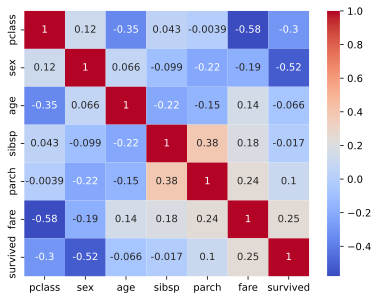

In [15]:
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

X_train['sex'] = X_train['sex'].map(lambda x: 1 if x == 'male' else 0)
df_show = pd.concat([X_train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']], y_train], axis = 1)
print("Valori unici dopo mapping:", X_train['sex'].unique())
print("Tipo dato:", X_train['sex'].dtype)
print(df_show.corr()['sex'])  # Vedi le correlazioni di sex
print( X_train['sex'].value_counts())
g = sns.heatmap(df_show.corr(),
                annot=True, 
              cmap = "coolwarm")

X_train.head()

### 2.4 Features engineering (optional)

#### Exercise 2.4.1

If you want, you can create new columns here from the ones available.

In [16]:
#### START CODE HERE ####
X_train['family_count'] = X_train['parch'] + X_train['sibsp'] + 1 #the person himself
X_test['family_count'] = X_test['parch'] + X_test['sibsp'] + 1 #the person himself

#### END CODE HERE ####


X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest,family_count
665,3,0,18.000000,0,1,14.4542,C,"Syria Ottawa, ON",2
76,1,0,39.000000,1,1,83.1583,C,"Lakewood, NJ",3
819,3,0,29.604316,0,0,7.7500,Q,"Co Clare, Ireland Washington, DC",1
912,3,1,30.000000,0,0,7.8958,S,NaN,1
382,2,0,29.604316,0,0,21.0000,S,"Upper Burma, India Pittsburgh, PA",1


### 2.5 Discretization

The next cell performs the **discretization** of the age column with **fixed-intervals**. 
You can learn more about **discretization** <a href="https://trainindata.medium.com/variable-discretization-in-machine-learning-7b09009915c2" >here</a>.

In [17]:
age_category = ['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']
 
X_train['age_disc']=pd.cut(x=X_train['age'], bins=[0,14,24,50,100],labels=age_category)
X_train = X_train.drop(columns=['age']) # Remove the old age column

X_test['age_disc']=pd.cut(x=X_test['age'], bins=[0,14,24,50,100],labels=age_category)
X_test = X_test.drop(columns=['age']) # Remove the old age column

In [117]:
X_train.head()

,pclass,sex,sibsp,parch,fare,embarked,home.dest,family_count,age_disc
665,3,0,0,1,14.4542,C,"Syria Ottawa, ON",2,Young (14-24]
76,1,0,1,1,83.1583,C,"Lakewood, NJ",3,Adults (24-50]
819,3,0,0,0,7.7500,Q,"Co Clare, Ireland Washington, DC",1,Adults (24-50]
912,3,1,0,0,7.8958,S,NaN,1,Adults (24-50]
382,2,0,0,0,21.0000,S,"Upper Burma, India Pittsburgh, PA",1,Adults (24-50]


In [18]:
X_test['sex'] = X_test['sex'].map(lambda x: 1 if x == 'male' else 0)

X_test.head()

,pclass,sex,sibsp,parch,fare,embarked,home.dest,family_count,age_disc
1028,3,0,1,0,24.1500,Q,NaN,2,Adults (24-50]
1121,3,1,1,1,22.3583,C,NaN,3,Adults (24-50]
1155,3,1,0,0,7.7750,S,NaN,1,Adults (24-50]
1251,3,1,0,0,8.0500,S,NaN,1,Adults (24-50]
721,3,1,0,0,7.4958,S,"Bulgaria Chicago, IL",1,Adults (24-50]


### 2.7 One-hot encoding

The following cells perform the **one-hot encoding** of the categorical features using the `OneHotEncoder` of the **Scikit-Learn** library. You can also use a similar approach using the `get_dummies` function of **Pandas**.

You can learn the differences between `OneHotEncoder` and `get_dummies` <a href="https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/" >here</a>.

When building the `OneHotEncoder` object, the `handle_unknown` parameter is set to `'ignore'`. 


In [120]:
X_train.head()

,pclass,sex,sibsp,parch,fare,embarked,home.dest,family_count,age_disc
665,3,0,0,1,14.4542,C,"Syria Ottawa, ON",2,Young (14-24]
76,1,0,1,1,83.1583,C,"Lakewood, NJ",3,Adults (24-50]
819,3,0,0,0,7.7500,Q,"Co Clare, Ireland Washington, DC",1,Adults (24-50]
912,3,1,0,0,7.8958,S,NaN,1,Adults (24-50]
382,2,0,0,0,21.0000,S,"Upper Burma, India Pittsburgh, PA",1,Adults (24-50]


In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore') 

In [20]:
categorical_columns = ['embarked']

In [21]:
ohe.fit(X_train[categorical_columns]) # Fit on training data, seleziono solo categorical features

temp_df = pd.DataFrame(data=ohe.transform(X_train[categorical_columns]).toarray(), 
                       columns=ohe.get_feature_names_out()) # Create a new DataFrame with only the one-hot encoded cols
#get_feature_names_out indica il nome delle colonne specifico per ogni tipo di feature, ad esempio ['sex_0', 'sex_1', 'embarked_C', 'embarked_Q', 'embarked_S']

X_train.drop(columns=categorical_columns, axis=1, inplace=True) # Remove the old categorical columns from the original data
X_train = pd.concat([X_train.reset_index(drop=True), temp_df], axis=1) #reset index serve per resettare gli indici con l'ordine (non ordina quelli esistenti, ne crea di nuovi con successione ordinata, ma mantenendo l'ordine originale)
# a 0, 1, 2 ecc e drop=True indica che la colonna di indici vecchia viene eliminata per dare spazio a quella nuova

X_train.head()

,pclass,sex,sibsp,parch,fare,home.dest,family_count,age_disc,embarked_C,embarked_Q,embarked_S
0,3,0,0,1,14.4542,"Syria Ottawa, ON",2,Young (14-24],1.0,0.0,0.0
1,1,0,1,1,83.1583,"Lakewood, NJ",3,Adults (24-50],1.0,0.0,0.0
2,3,0,0,0,7.7500,"Co Clare, Ireland Washington, DC",1,Adults (24-50],0.0,1.0,0.0
3,3,1,0,0,7.8958,NaN,1,Adults (24-50],0.0,0.0,1.0
4,2,0,0,0,21.0000,"Upper Burma, India Pittsburgh, PA",1,Adults (24-50],0.0,0.0,1.0


In [22]:
temp_df = pd.DataFrame(data=ohe.transform(X_test[categorical_columns]).toarray(), columns=ohe.get_feature_names_out())

X_test.drop(columns=categorical_columns, axis=1, inplace=True)
X_test = pd.concat([X_test.reset_index(drop=True), temp_df], axis=1)

X_test.head()

,pclass,sex,sibsp,parch,fare,home.dest,family_count,age_disc,embarked_C,embarked_Q,embarked_S
0,3,0,1,0,24.1500,NaN,2,Adults (24-50],0.0,1.0,0.0
1,3,1,1,1,22.3583,NaN,3,Adults (24-50],1.0,0.0,0.0
2,3,1,0,0,7.7750,NaN,1,Adults (24-50],0.0,0.0,1.0
3,3,1,0,0,8.0500,NaN,1,Adults (24-50],0.0,0.0,1.0
4,3,1,0,0,7.4958,"Bulgaria Chicago, IL",1,Adults (24-50],0.0,0.0,1.0


### 2.7 Ordinal Encoding

When the categorical feature are ordinal we can use ordinal Encoding. Since the order among the categories is important, encoding should reflect the sequence.

In [23]:
age_category

['Child (0-14]', 'Young (14-24]', 'Adults (24-50]', 'Senior (50+]']

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[age_category]) # Should be a list becuause you can specify the categories for multiple columns


ord_enc.fit(X_train.loc[:, ["age_disc"]]) # Fit on training data



,categories,"[['Child (0-14]', 'Young (14-24]', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [25]:
X_train["age_disc_enc"] = ord_enc.transform(X_train.loc[:, ["age_disc"]])

X_train.head()

,pclass,sex,sibsp,parch,fare,home.dest,family_count,age_disc,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,1,14.4542,"Syria Ottawa, ON",2,Young (14-24],1.0,0.0,0.0,1.0
1,1,0,1,1,83.1583,"Lakewood, NJ",3,Adults (24-50],1.0,0.0,0.0,2.0
2,3,0,0,0,7.7500,"Co Clare, Ireland Washington, DC",1,Adults (24-50],0.0,1.0,0.0,2.0
3,3,1,0,0,7.8958,NaN,1,Adults (24-50],0.0,0.0,1.0,2.0
4,2,0,0,0,21.0000,"Upper Burma, India Pittsburgh, PA",1,Adults (24-50],0.0,0.0,1.0,2.0


In [26]:
X_train.drop(columns=["age_disc"], axis=1, inplace=True)

X_train.head()

,pclass,sex,sibsp,parch,fare,home.dest,family_count,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,0,1,14.4542,"Syria Ottawa, ON",2,1.0,0.0,0.0,1.0
1,1,0,1,1,83.1583,"Lakewood, NJ",3,1.0,0.0,0.0,2.0
2,3,0,0,0,7.7500,"Co Clare, Ireland Washington, DC",1,0.0,1.0,0.0,2.0
3,3,1,0,0,7.8958,NaN,1,0.0,0.0,1.0,2.0
4,2,0,0,0,21.0000,"Upper Burma, India Pittsburgh, PA",1,0.0,0.0,1.0,2.0


In [27]:
X_test["age_disc_enc"] = ord_enc.transform(X_test.loc[:, ["age_disc"]])
X_test.drop(columns=["age_disc"], axis=1, inplace=True)

X_test.head()

,pclass,sex,sibsp,parch,fare,home.dest,family_count,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,3,0,1,0,24.1500,NaN,2,0.0,1.0,0.0,2.0
1,3,1,1,1,22.3583,NaN,3,1.0,0.0,0.0,2.0
2,3,1,0,0,7.7750,NaN,1,0.0,0.0,1.0,2.0
3,3,1,0,0,8.0500,NaN,1,0.0,0.0,1.0,2.0
4,3,1,0,0,7.4958,"Bulgaria Chicago, IL",1,0.0,0.0,1.0,2.0


### 2.8 Normalization/Standardization

#### Exercise 2.8.1 

Perform **Min-Max** normalization of the *numerical features*. Remember to **fit** on the training and not on the test. Note that `age_disc_enc` in this case is categorical but can be normalized too.

In [28]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ["pclass", "sibsp", "parch", "fare", "age_disc_enc", 'family_count']

#### START CODE HERE (~4 lines) ####

minmax_s = MinMaxScaler()

minmax_s.fit(X_train[numerical_features]) 

X_train[numerical_features] = minmax_s.transform(X_train[numerical_features])
X_test[numerical_features] = minmax_s.transform(X_test[numerical_features])

#### END CODE HERE ####

In [141]:
X_train.head()

,pclass,sibsp,parch,fare,home.dest,family_count,sex_0,sex_1,embarked_C,embarked_Q,embarked_S,age_disc_enc
0,1.0,0.000,0.111111,0.028213,"Syria Ottawa, ON",0.090909,1.0,0.0,1.0,0.0,0.0,0.333333
1,0.0,0.125,0.111111,0.162314,"Lakewood, NJ",0.193182,1.0,0.0,1.0,0.0,0.0,0.666667
2,1.0,0.000,0.000000,0.015127,"Co Clare, Ireland Washington, DC",0.000000,1.0,0.0,0.0,1.0,0.0,0.666667
3,1.0,0.000,0.000000,0.015412,NaN,0.000000,0.0,1.0,0.0,0.0,1.0,0.666667
4,0.5,0.000,0.000000,0.040989,"Upper Burma, India Pittsburgh, PA",0.000000,1.0,0.0,0.0,0.0,1.0,0.666667


In [142]:
X_test.head()

,pclass,sibsp,parch,fare,home.dest,sex_0,sex_1,embarked_C,embarked_Q,embarked_S,age_disc_enc,family_count
0,1.0,0.125,0.000000,0.047138,NaN,1.0,0.0,0.0,1.0,0.0,0.666667,0.102273
1,1.0,0.125,0.111111,0.043640,NaN,0.0,1.0,1.0,0.0,0.0,0.666667,0.193182
2,1.0,0.000,0.000000,0.015176,NaN,0.0,1.0,0.0,0.0,1.0,0.666667,0.000000
3,1.0,0.000,0.000000,0.015713,NaN,0.0,1.0,0.0,0.0,1.0,0.666667,0.000000
4,1.0,0.000,0.000000,0.014631,"Bulgaria Chicago, IL",0.0,1.0,0.0,0.0,1.0,0.666667,0.000000


### 2.9 Features Reduction

Now we fit PCA on the standardized training data and compute the cumulative explained variance. This tells us how much variance is captured as we increase the number of components.

👉 Plot the cumulative variance curve and add a red line at 90% to guide component selection.

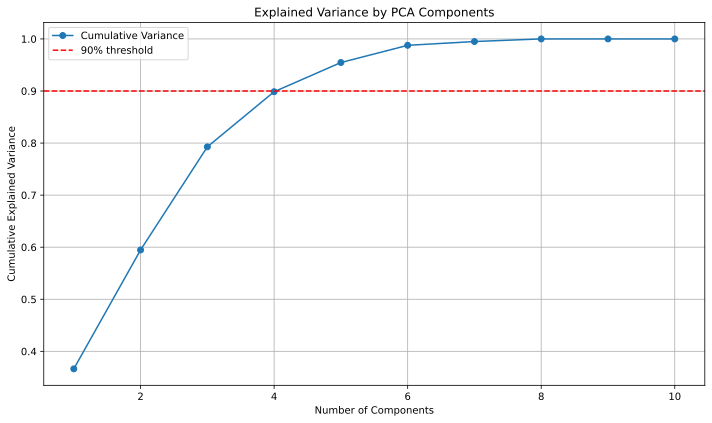

In [33]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#X_train.drop(columns=['home.dest'], inplace=True)
#X_test.drop(columns=['home.dest'], inplace=True)

#start code
pca = PCA()
X_projection = pca.fit_transform(X_train)
plt.figure(figsize=(10, 6))
cumul = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, pca.n_components_ + 1), cumul, marker='o', linestyle='-', label='Cumulative Variance')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% threshold')

#end code

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Based on the plot above, select the minimum number of components needed to reach a certain threshold (e.g. 90% of the total variance).

👉 Compute the number of components programmatically.

In [35]:
print(cumul)
threshold = 0.9

#start code
threshold = 0.9
n_components = np.where(cumul >= threshold)[0][0] + 1
#end code

print(f"Number of components to reach {threshold*100:.0f}% variance: {n_components}")


[0.36637459 0.59473657 0.79273613 0.89862178 0.954685   0.9877196
 0.99498931 1.         1.         1.        ]
Number of components to reach 90% variance: 5


Now we re-fit PCA using only the selected number of components, and project both training and test data into this reduced space.

👉 Use .fit_transform() on training, and .transform() on test (no refit!).



In [36]:
#start code
pca = PCA(n_components=5)

X_trainp_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#end code

The loadings show how much each original feature contributes to each principal component.

👉 Compute the loadings and visualize the contributions of each feature to PC₁ and PC₂ using a horizontal bar chart.

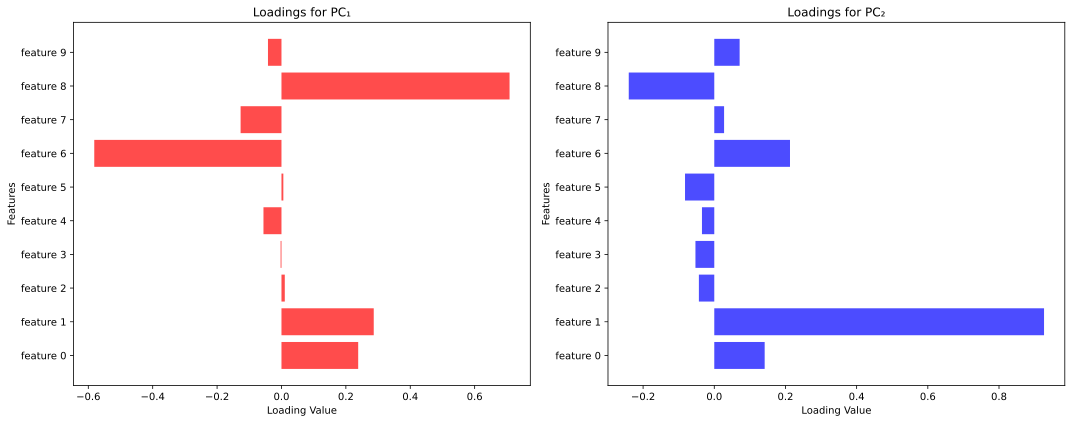

In [37]:
#start code
# as index use: features = [f"feature_{i}" for i in range(X_train.shape[1])]
loadings = pca.components_ #(components, features)

pc1 = loadings[0, :] #prendo tutti i pesi per il primo componente
pc2 = loadings[1, :] #prendo tutti i pesi per il secondo componente

#creo nomi features
features = [f'feature {i}' for i in range(loadings.shape[1])]

# Crea subplot per confrontare PC1 e PC2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PC₁ - Barre orizzontali
ax1.barh(features, pc1, color='red', alpha=0.7)
ax1.set_title('Loadings for PC₁')
ax1.set_xlabel('Loading Value')
ax1.set_ylabel('Features')

# PC₂ - Barre orizzontali  
ax2.barh(features, pc2, color='blue', alpha=0.7)
ax2.set_title('Loadings for PC₂')
ax2.set_xlabel('Loading Value')
ax2.set_ylabel('Features')

plt.tight_layout()

<a id='3'></a>
## 3. Model Training and Evaluation

Now, you can **train** and **evaluate** a **binary classification** model on the pre-processed dataset. 

### 3.1 Training

In [41]:
y_test

1028    1
1121    1
1155    0
1251    0
721     0
1157    0
512     0
20      1
50      1
983     0
329     1
1045    0
476     0
465     1
975     0
516     0
127     1
994     0
518     0
77      0
181     1
533     1
995     0
1263    0
351     0
39      0
947     1
183     1
1173    0
1153    0
407     1
1066    0
1118    0
429     0
474     0
922     1
1143    0
462     0
742     1
330     0
889     1
249     1
1024    0
906     0
596     1
69      1
13      1
959     0
843     0
1075    0
728     0
1197    0
433     0
440     1
37      1
349     1
1026    1
982     0
867     1
402     1
1254    1
116     1
1186    0
266     0
0       1
284     1
136     1
340     1
571     0
1122    1
1209    0
578     0
379     1
409     0
72      1
514     1
656     1
513     1
391     0
22      1
5       1
241     0
968     0
837     0
615     0
1171    0
1044    1
1172    0
974     0
532     0
650     0
831     0
192     1
453     0
452     1
729     0
23      1
345     0
855     0
1174    0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
y_train.info()

#hyperparameter tuning
parameter_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]
}
model = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameter_grid,
    cv = 5,
    scoring='accuracy', 
    n_jobs=-1, 
    n_iter=30
)

random_search.fit(X_trainp_pca, y_train)





<class 'pandas.core.series.Series'>
Index: 1047 entries, 665 to 240
Series name: survived
Non-Null Count  Dtype   
--------------  -----   
1047 non-null   category
dtypes: category(1)
memory usage: 9.3 KB
mean accuracy of best estimator with cross-validation on training set: 0.7918204602415129
f1 of best estimator: 0.73224043715847


### 3.2 Evaluation

mean accuracy of best estimator with cross-validation on training set: 0.7927591706539074
f1 of best estimator: 0.73224043715847


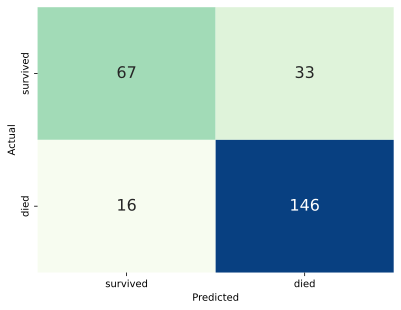

In [51]:
scores = cross_val_score(random_search.best_estimator_, X_trainp_pca, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f'mean accuracy of best estimator with cross-validation on training set: {scores.mean()}')
y_pred = random_search.best_estimator_.predict(X_test_pca)

evaluation_f1 = f1_score(y_test.astype(int), y_pred.astype(int))
print(f'f1 of best estimator: {evaluation_f1}')

from sklearn.metrics import confusion_matrix
import seaborn as sns

matr = confusion_matrix(y_test.astype(int), y_pred.astype(int), labels = [1, 0])
sns.heatmap(matr, annot=True, cbar=False , cmap='GnBu', annot_kws={'size':16}, fmt='g', xticklabels=['survived', 'died'], yticklabels=['survived', 'died'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()